## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matrix = (np.random.random((10,10))-0.5)*2
print (matrix)

[[-0.82950551 -0.64595287 -0.13156416  0.90632205  0.59821752  0.84114091
   0.28033233 -0.35423829 -0.46588309  0.03345244]
 [ 0.71072977  0.5818262   0.33516604 -0.78293718  0.30709226 -0.22557837
   0.08550659 -0.68891036  0.13779268  0.28698132]
 [ 0.2869504  -0.53887222 -0.29597487  0.41534904  0.80177299  0.58158437
  -0.66646406  0.26986816  0.12739006  0.86028177]
 [-0.84663527  0.62406399  0.12240165 -0.80612777 -0.14557782 -0.6831669
   0.38924865 -0.19265171 -0.5998271  -0.39043748]
 [-0.63310005 -0.73790288  0.02241497  0.03282626  0.58596789 -0.19242917
   0.33979523  0.73905471 -0.60391858  0.4752654 ]
 [ 0.55599408  0.88609615 -0.50358657 -0.22123099  0.73833312  0.14557425
   0.03985561  0.93788033  0.3724462   0.26496053]
 [-0.23358775 -0.4361355  -0.88645217 -0.55143218 -0.07910198 -0.22021602
   0.83029335 -0.6987804   0.26001133 -0.62931822]
 [-0.09888887 -0.46923811  0.14749684  0.66640946 -0.33240522 -0.11303774
   0.01907161  0.01662012 -0.43533278 -0.29497495]
 

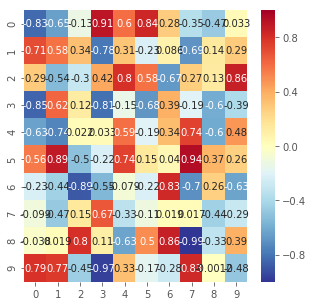

In [4]:
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.show()

In [5]:
nrow = 1000
ncol = 3

matrix = (np.random.random((nrow, ncol))-0.5)*2
print (matrix)

[[ 0.97641867 -0.85415561 -0.52186958]
 [-0.54988447 -0.59565787  0.65965963]
 [ 0.12001816  0.09585841 -0.64151613]
 ...
 [-0.95219668  0.64676578  0.66599447]
 [-0.26251721 -0.36374218 -0.50508817]
 [-0.95741084  0.64413309  0.6241182 ]]


In [6]:
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()
plot_data.head()

,index,0,1,2
0,0,0.976419,-0.854156,-0.521870
1,0,-0.549884,-0.595658,0.659660
2,0,0.120018,0.095858,-0.641516
3,2,0.668060,0.978485,0.267881
4,1,-0.435432,-0.346485,0.743373


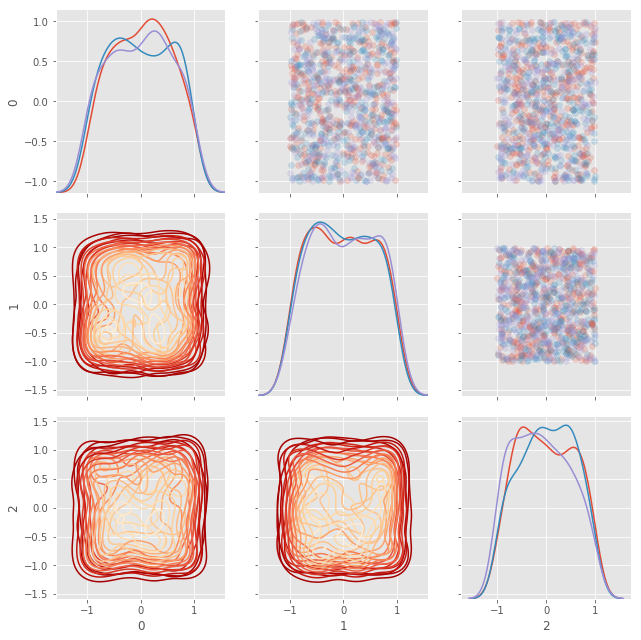

In [7]:
# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])



grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot )
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

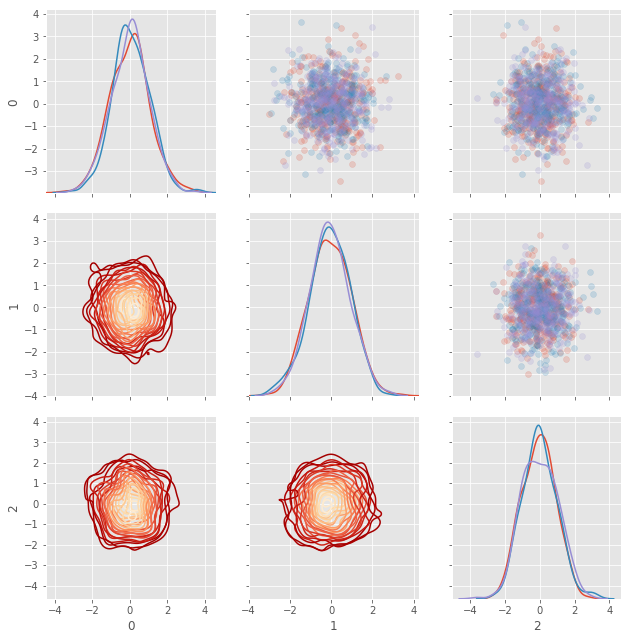

In [8]:
nrow = 1000
ncol = 3

matrix = np.random.randn(nrow, ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot )
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()